In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from google.colab import files

In [4]:
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [5]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

In [6]:
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [7]:
print("Red Wine Dataset:")
print(red_wine.info())
print("\nWhite Wine Dataset:")
print(white_wine.info())

Red Wine Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_type             1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB
None

White Wine Dataset:
<class 'pandas.core

In [8]:
print(red_wine.describe())
print()
print()
print(white_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

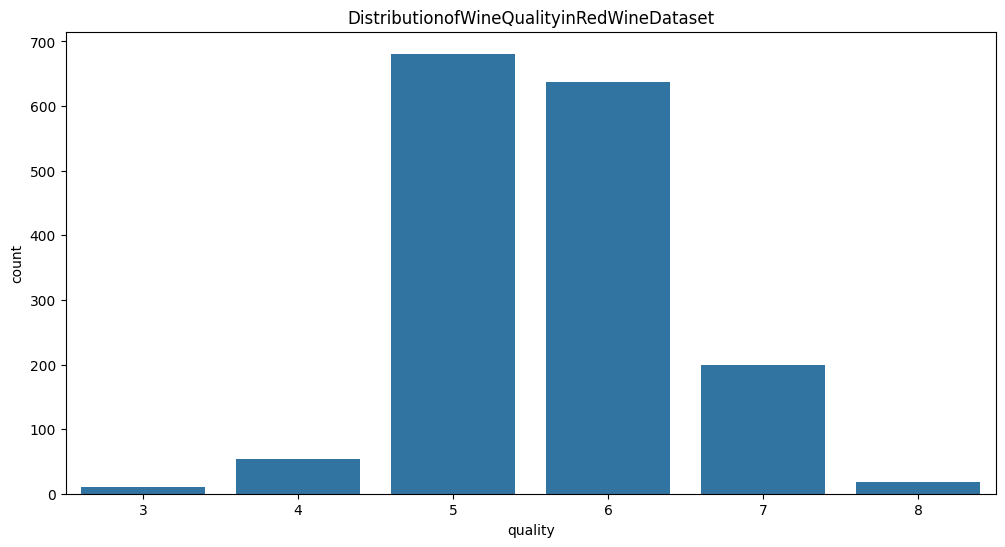

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=red_wine,x='quality')
plt.title("DistributionofWineQualityinRedWineDataset")
plt.show()

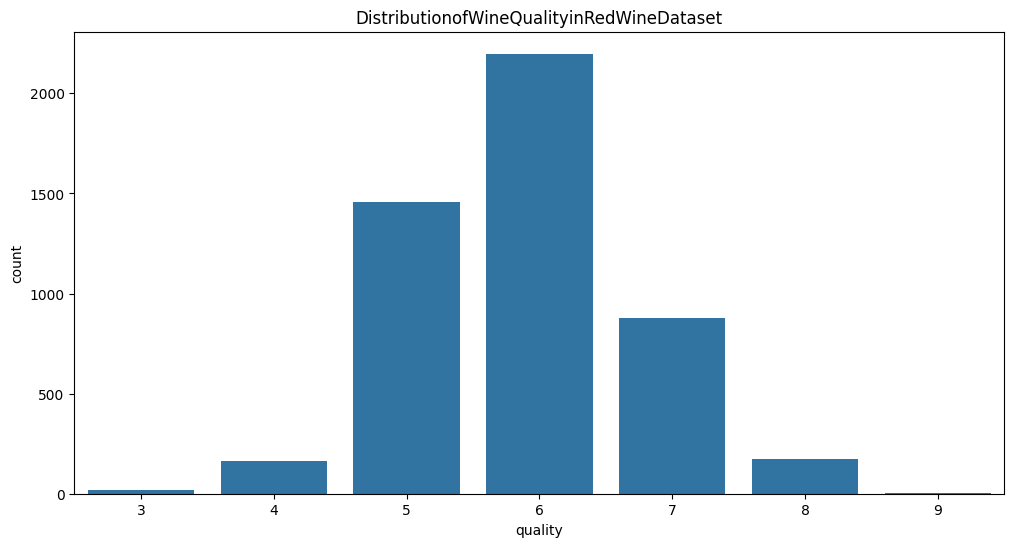

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=white_wine,x='quality')
plt.title("DistributionofWineQualityinRedWineDataset")
plt.show()

<Figure size 1200x600 with 0 Axes>

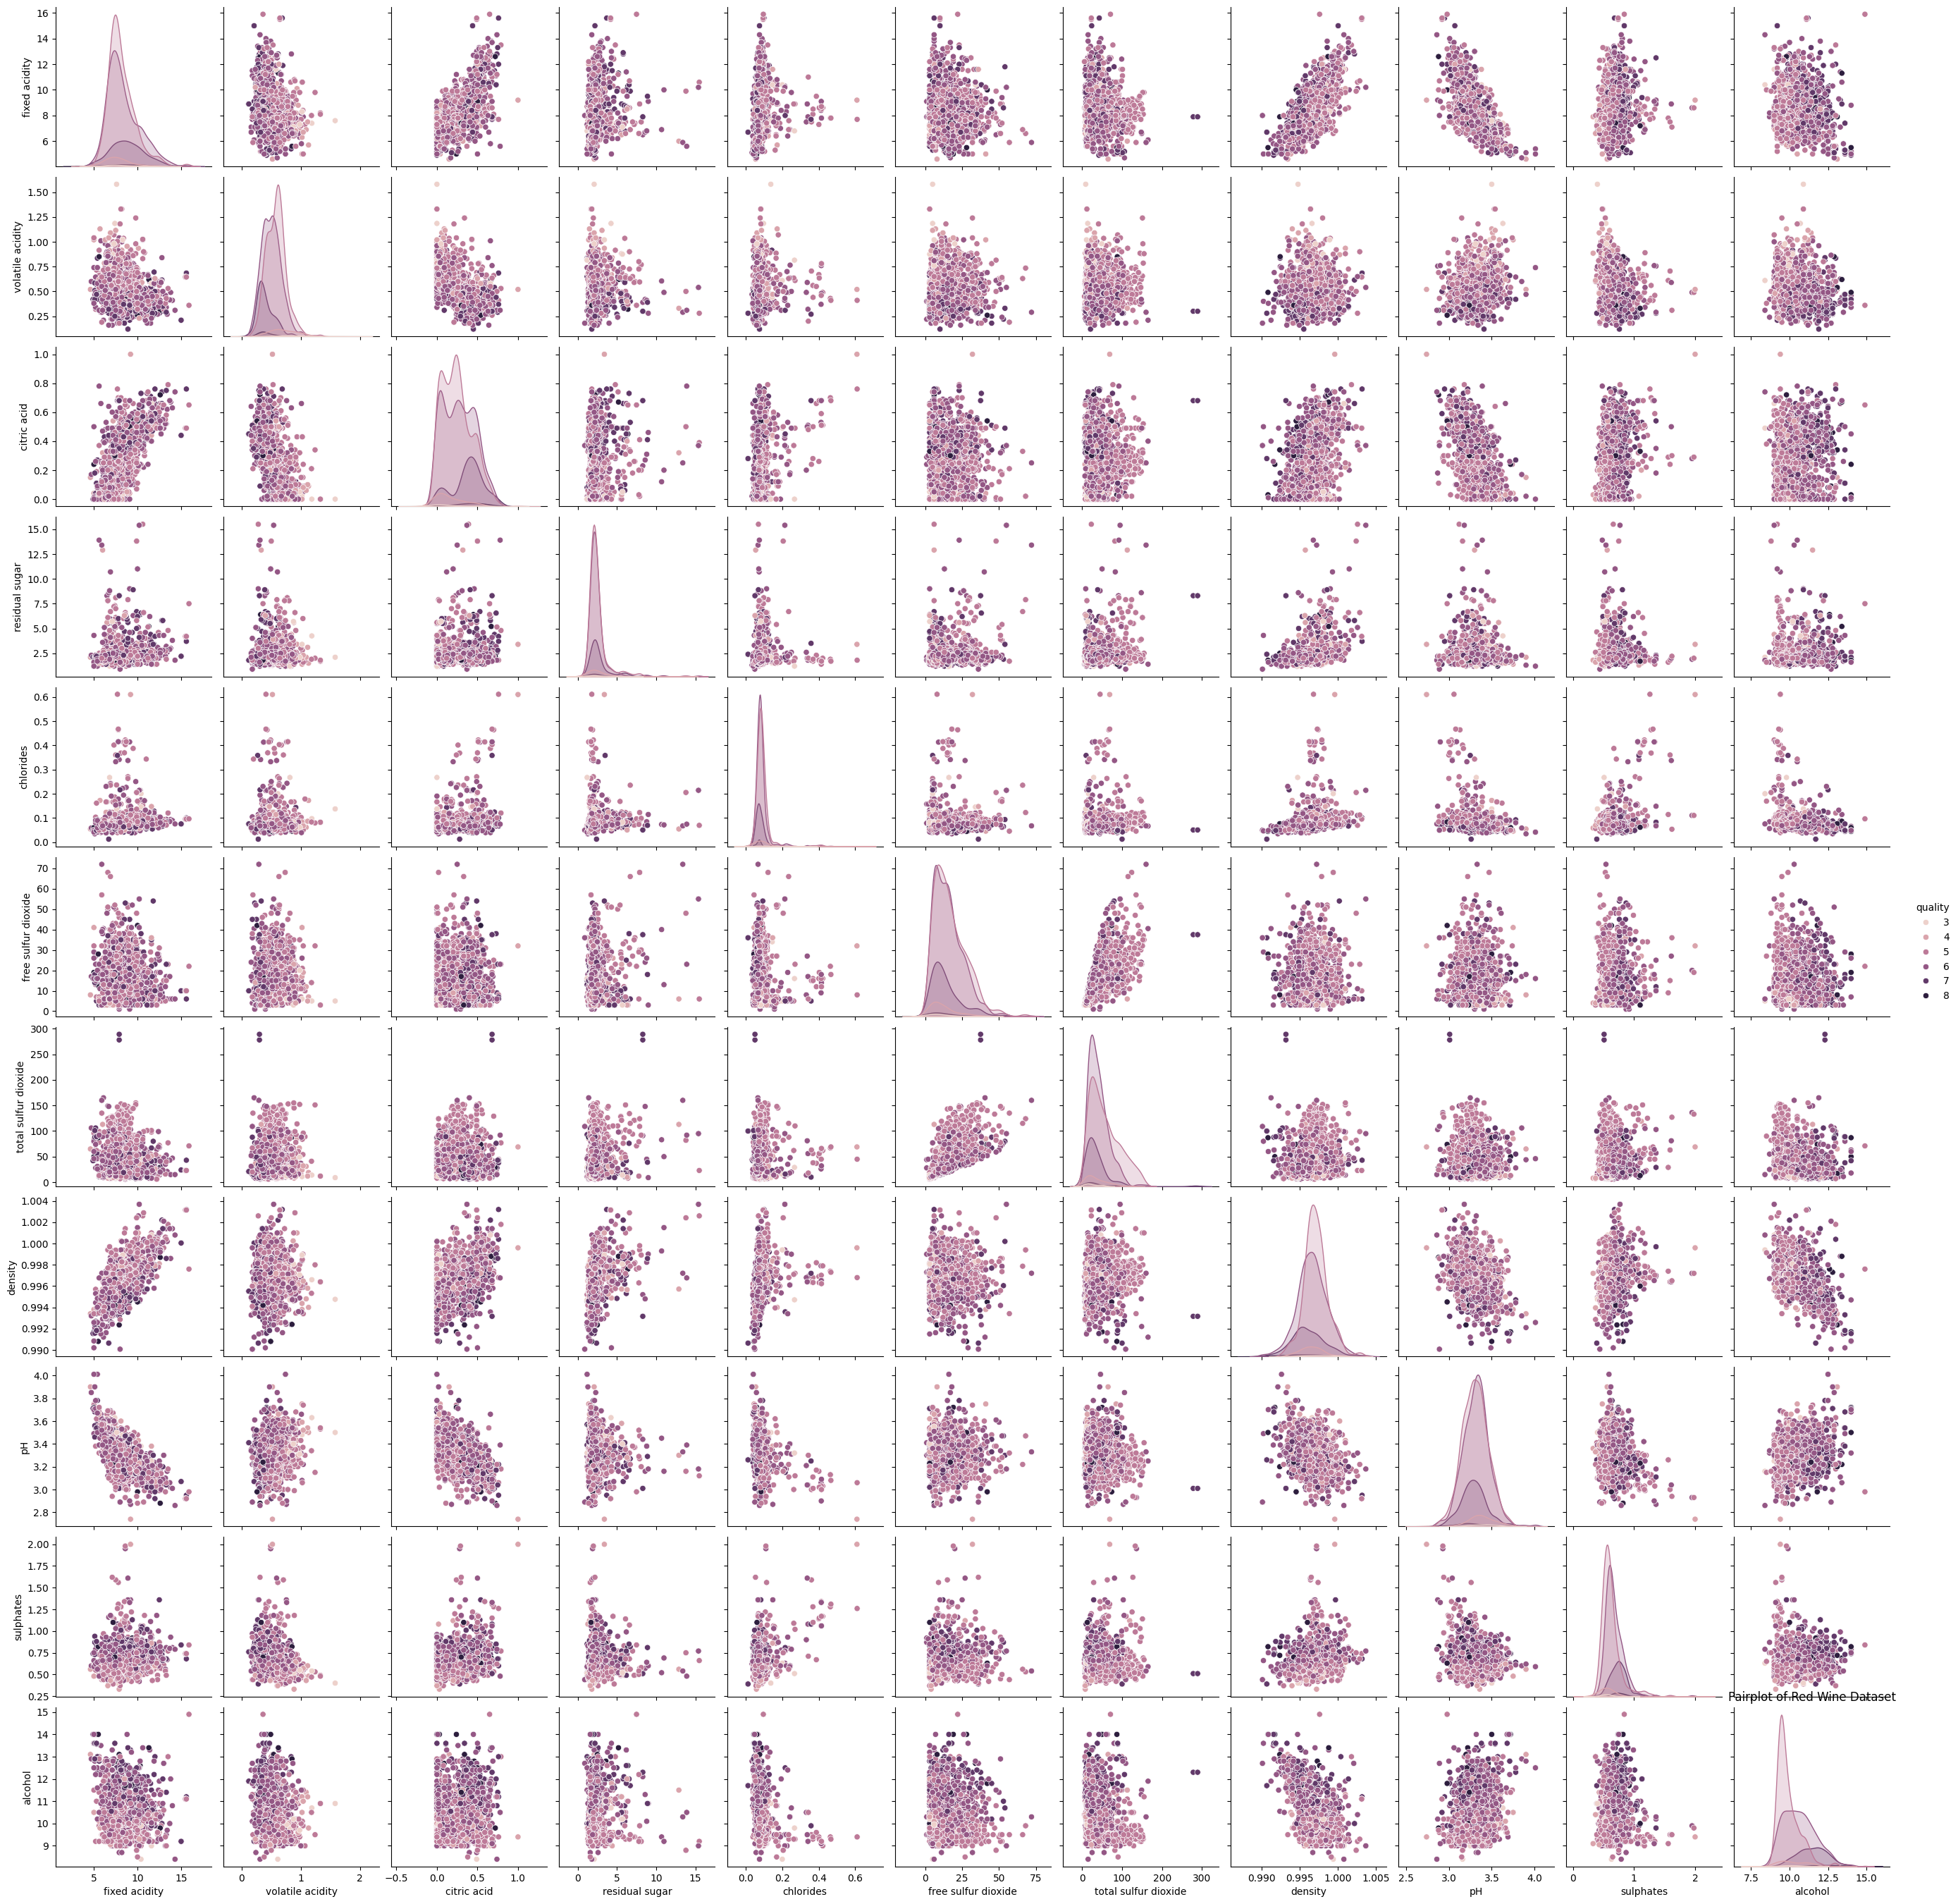

In [11]:
plt.figure(figsize=(12, 6))
sns.pairplot(red_wine, hue='quality')
plt.title("Pairplot of Red Wine Dataset")
plt.show()

<Figure size 1200x600 with 0 Axes>

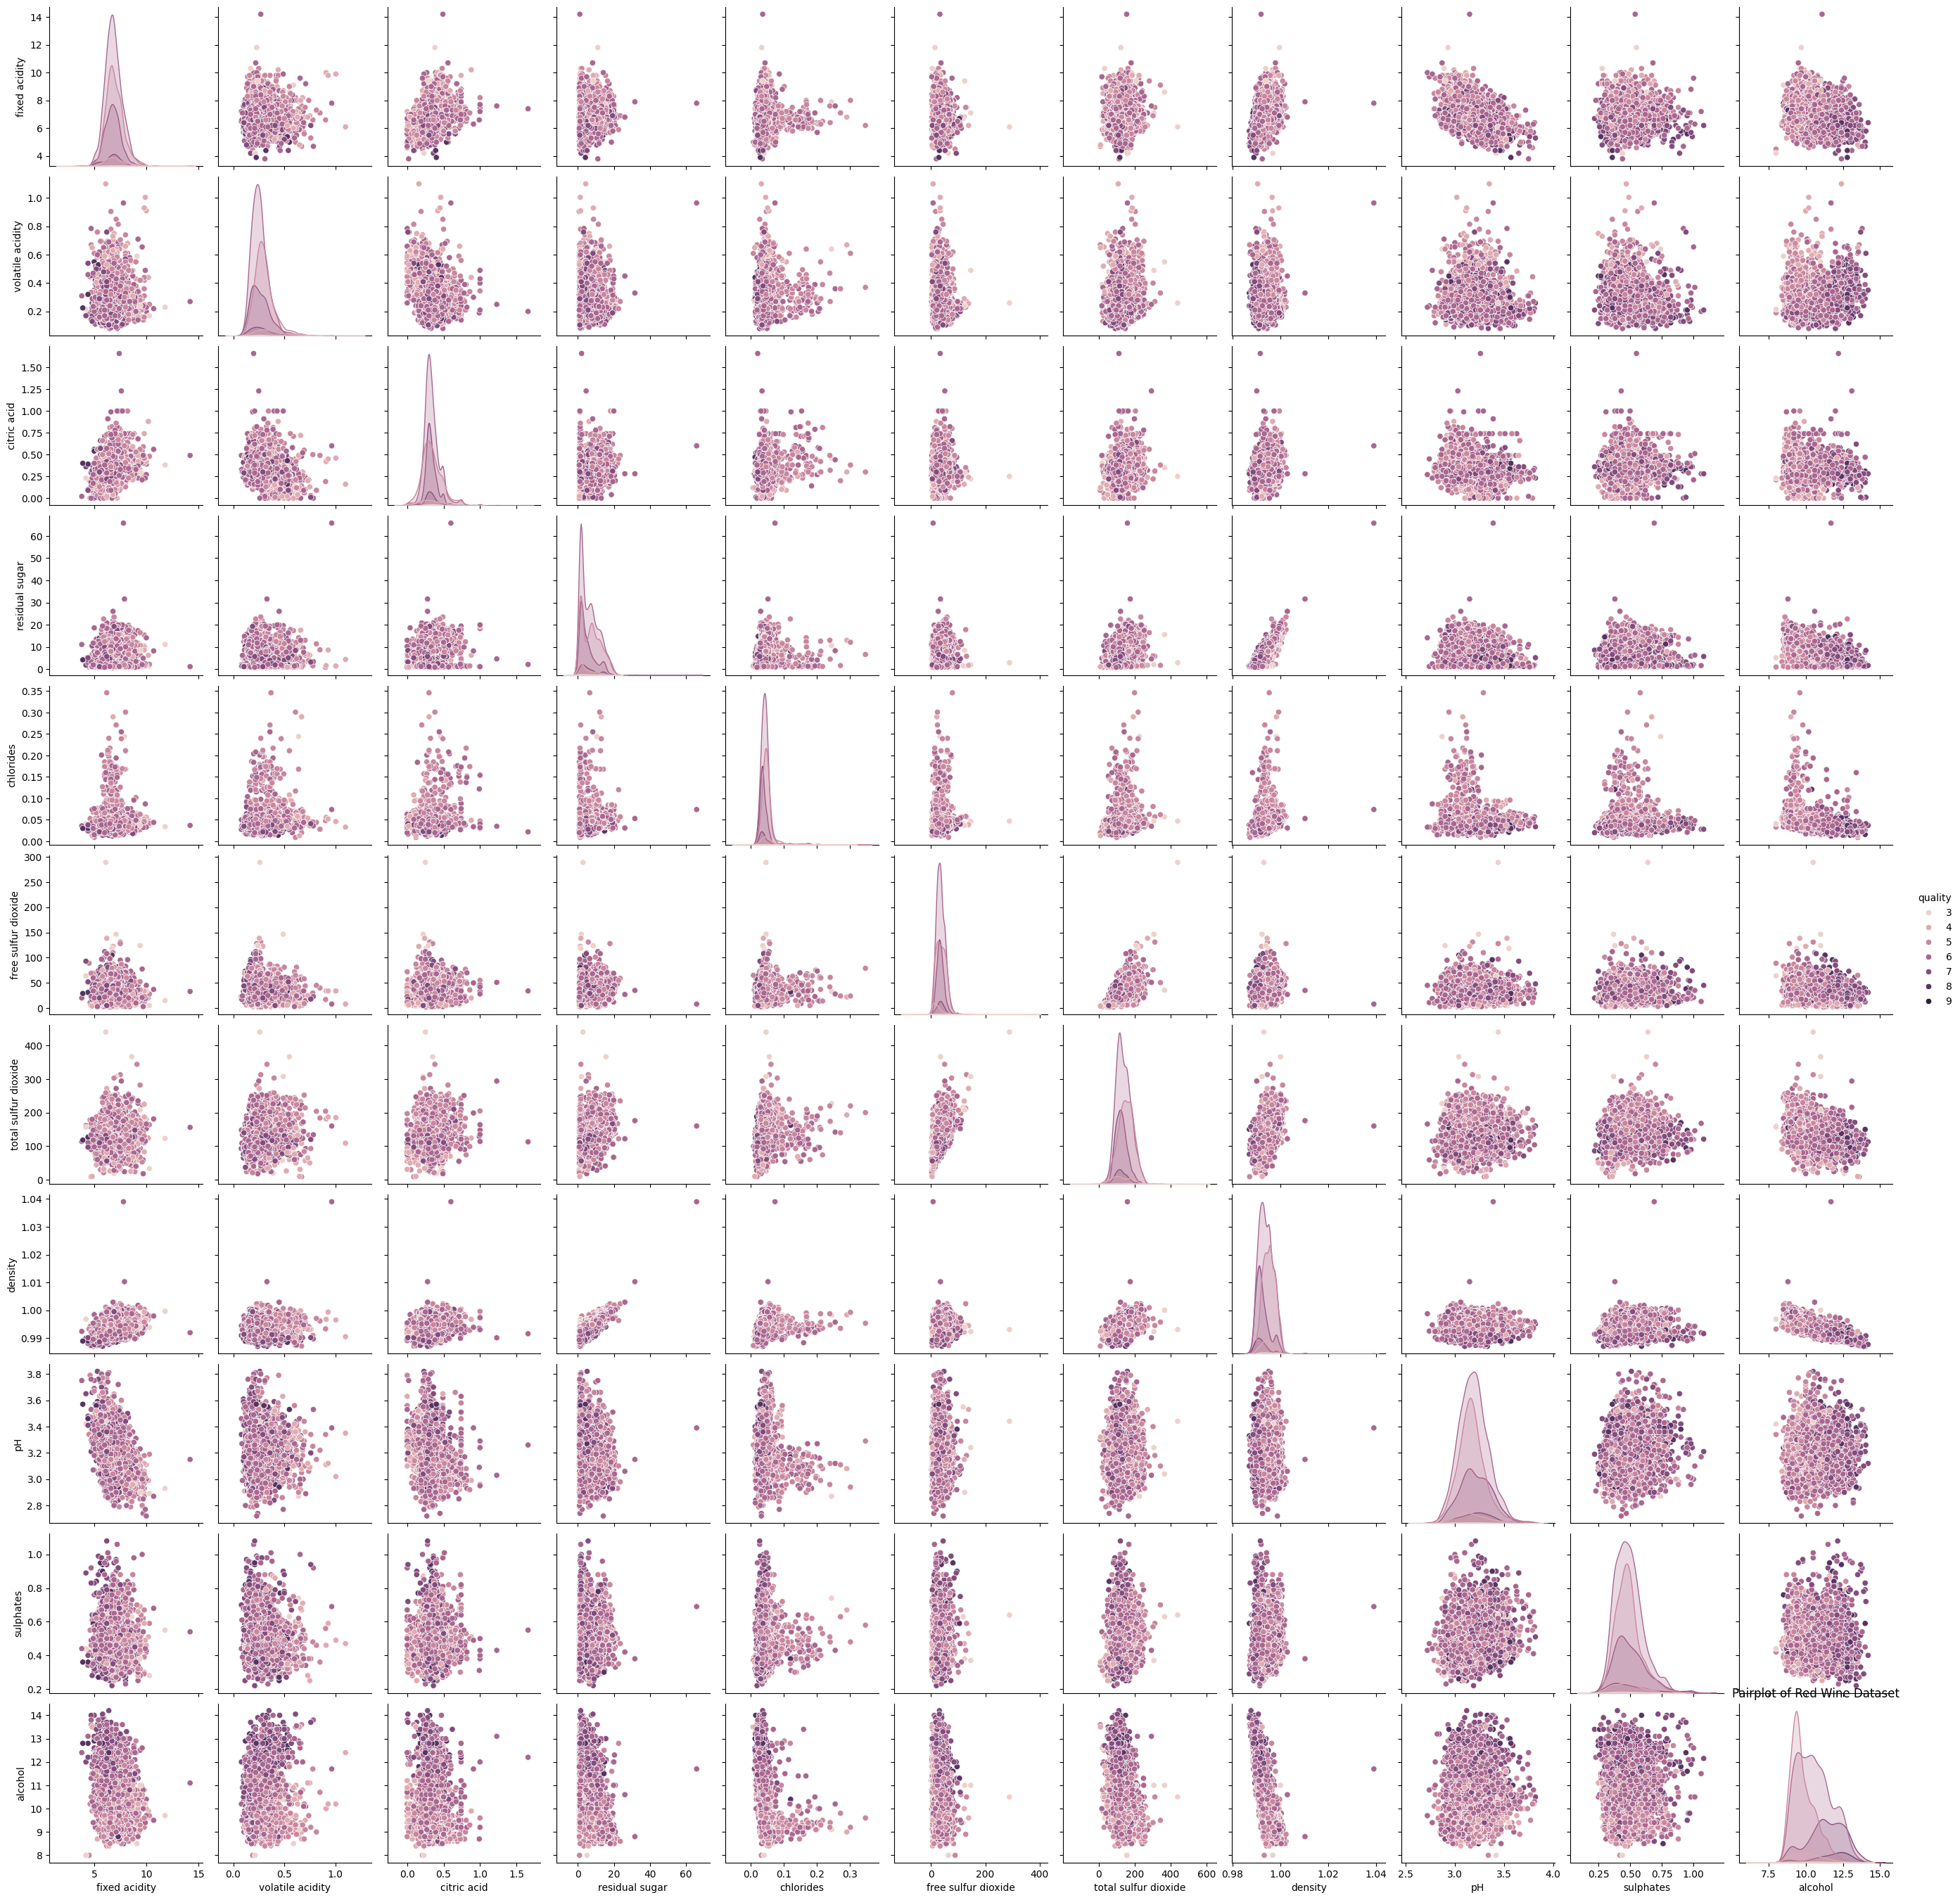

In [12]:
plt.figure(figsize=(12, 6))
sns.pairplot(white_wine, hue='quality')
plt.title("Pairplot of Red Wine Dataset")
plt.show()

In [13]:
# Remove null values
red_wine = red_wine.dropna()
white_wine = white_wine.dropna()

In [14]:
# Check for missing values
print(red_wine.isnull().sum())
print(white_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [15]:
# Function to remove outliers based on IQR
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64'] and col != 'wine_type':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
    return df

# Apply outlier removal
red_wine_cleaned = remove_outliers(red_wine)
white_wine_cleaned = remove_outliers(white_wine)

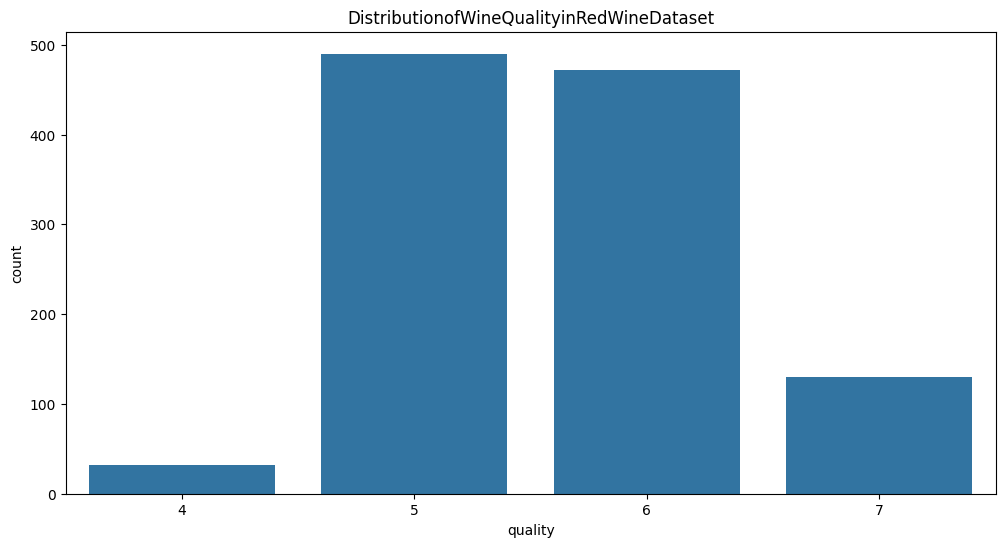

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=red_wine_cleaned,x='quality')
plt.title("DistributionofWineQualityinRedWineDataset")
plt.show()

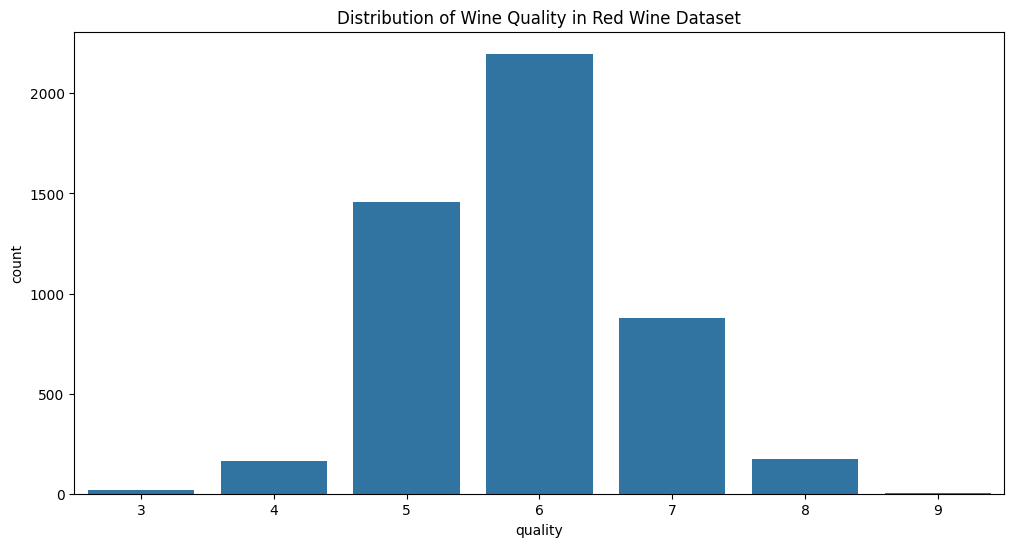

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=white_wine, x='quality')
plt.title("Distribution of Wine Quality in Red Wine Dataset")
plt.show()

In [18]:
red_wine_cleaned['quality'] = red_wine_cleaned['quality'].apply(lambda x: 1 if x >= 7 else 0)
white_wine_cleaned['quality'] = white_wine_cleaned['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [19]:
# Initialize a scaler
scaler = StandardScaler()

# Scale red wine features
red_wine_features = red_wine_cleaned.drop(columns=['quality', 'wine_type'])
red_wine_scaled = pd.DataFrame(scaler.fit_transform(red_wine_features),columns=red_wine_features.columns)
red_wine_scaled['quality'] = red_wine_cleaned['quality'].values
red_wine_scaled['wine_type'] = red_wine_cleaned['wine_type'].values

# Scale white wine features
white_wine_features = white_wine_cleaned.drop(columns=['quality', 'wine_type'])
white_wine_scaled = pd.DataFrame(scaler.fit_transform(white_wine_features),columns=white_wine_features.columns)
white_wine_scaled['quality'] = white_wine_cleaned['quality'].values
white_wine_scaled['wine_type'] = white_wine_cleaned['wine_type'].values

In [20]:
# Combine the cleaned and scaled datasets
combined_data = pd.concat([red_wine_scaled, white_wine_scaled], axis=0,ignore_index=True)

# One-hot encode 'wine_type'
combined_data = pd.get_dummies(combined_data, columns=['wine_type'],drop_first=True)

In [21]:
# Check combined data structure
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4939 non-null   float64
 1   volatile acidity      4939 non-null   float64
 2   citric acid           4939 non-null   float64
 3   residual sugar        4939 non-null   float64
 4   chlorides             4939 non-null   float64
 5   free sulfur dioxide   4939 non-null   float64
 6   total sulfur dioxide  4939 non-null   float64
 7   density               4939 non-null   float64
 8   pH                    4939 non-null   float64
 9   sulphates             4939 non-null   float64
 10  alcohol               4939 non-null   float64
 11  quality               4939 non-null   int64  
 12  wine_type_white       4939 non-null   bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 468.0 KB
None


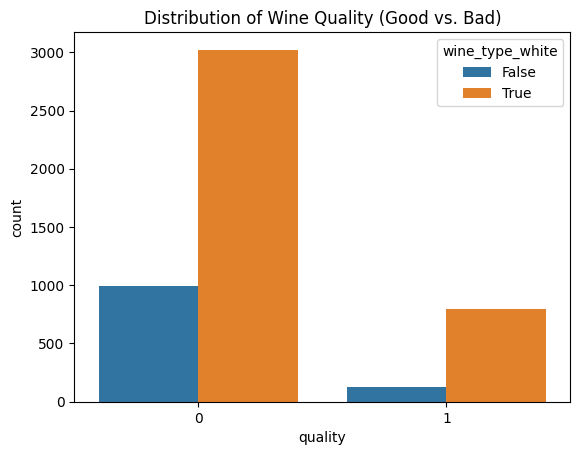

In [22]:
# Visualize the distribution of the target variable
sns.countplot(data=combined_data, x='quality', hue='wine_type_white')
plt.title("Distribution of Wine Quality (Good vs. Bad)")
plt.show()

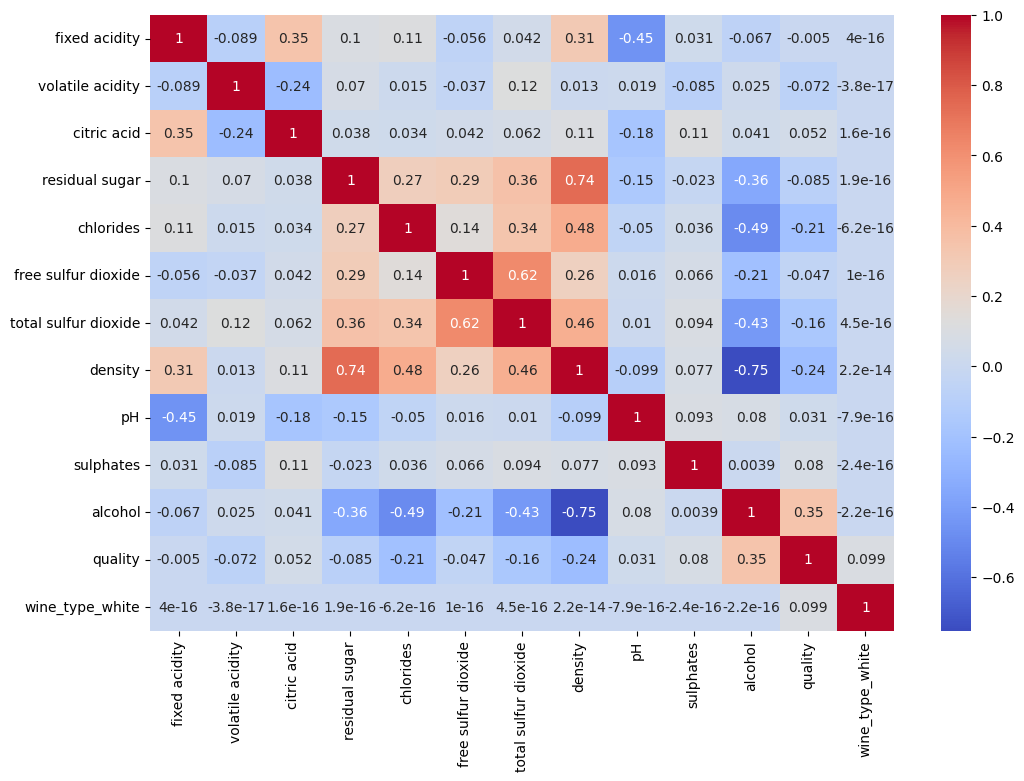

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Define features and target
X = combined_data.drop('quality', axis=1)
y = combined_data['quality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Initialize models
models = {
 'Logistic Regression': LogisticRegression(class_weight='balanced'),
 'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
 'Random Forest': RandomForestClassifier(class_weight='balanced'),
 'SVM': SVC(class_weight='balanced')
 }

#Train and evaluate models
for name, model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f"{name}-Accuracy:{accuracy_score(y_test,y_pred)}")
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))


Logistic Regression-Accuracy:0.7095141700404858
[[565 234]
 [ 53 136]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       799
           1       0.37      0.72      0.49       189

    accuracy                           0.71       988
   macro avg       0.64      0.71      0.64       988
weighted avg       0.81      0.71      0.74       988

Decision Tree-Accuracy:0.8238866396761133
[[705  94]
 [ 80 109]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       799
           1       0.54      0.58      0.56       189

    accuracy                           0.82       988
   macro avg       0.72      0.73      0.72       988
weighted avg       0.83      0.82      0.83       988

Random Forest-Accuracy:0.881578947368421
[[778  21]
 [ 96  93]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       799
           1       0.82      0.49    

In [25]:
#Hyperparameter tuning forRandomForest
param_grid= {
'n_estimators':[50, 100,200],
    'max_depth':[None, 10, 20, 30]
 }

grid_rf= GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid_rf.fit(X_train, y_train)

#Bestparametersandaccuracy
print("BestparametersforRandomForest:",grid_rf.best_params_)
y_pred_rf =grid_rf.predict(X_test)
print("TunedRandom Forest-Accuracy:",accuracy_score(y_test,y_pred_rf))

BestparametersforRandomForest: {'max_depth': 30, 'n_estimators': 100}
TunedRandom Forest-Accuracy: 0.8836032388663968


In [26]:
#Model comparison
model_comparison ={
'Model':['LogisticRegression','DecisionTree', 'RandomForest','SVM'],
'Accuracy':[
  accuracy_score(y_test,models['Logistic Regression'].predict(X_test)),
  accuracy_score(y_test,models['Decision Tree'].predict(X_test)),
  accuracy_score(y_test,y_pred_rf), #TunedRandomForest
  accuracy_score(y_test,models['SVM'].predict(X_test))
 ]
}
comparison_df =pd.DataFrame(model_comparison)
print(comparison_df)

                Model  Accuracy
0  LogisticRegression  0.709514
1        DecisionTree  0.823887
2        RandomForest  0.883603
3                 SVM  0.738866
